# 1- K-Means Unsupervised

Makine Öğrenmesi modellerinde bağımlı değişkenin olmadığı durumlarda gözlem birimlerinin bir şekilde anlamlı bir hale getirilme çalışmasıdır.

## TEORi

**Amaç, gözlemleri birbirlerine olan benzerliklerine göre kümelerine ayırmaktır.**

* Kümeler içi benzerlik yüksek, kümeler arası benzerlik düşük olmalıdır.

Adımları;
1. Adım: Küme sayısı belirlenir.
2. Adım: Rastgele k merkez seçilir.
3. Adım: Her gözlem için k merkezlere uzaklıkları hesaplanır ve gözlem kendisine en yakın k merkeze atanır.
4. Adım: Her gözlem en yakın olduğu merkeze yani kümeye atanır.
5. Adım: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplaması yapılır.
6. Adım: Bu işlemler belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetinin [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/USArrests.csv) indirebilirsiniz.

In [2]:
url = 'https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/USArrests.csv'
usaArrests = pd.read_csv(url)
df = usaArrests.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# indexin düzenlenmesi,
df.index = df.iloc[:, 0]
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [5]:
df = df.iloc[:, 1:len(df)]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.isnull().values.any() # verisetinde eksik degerler var mı?

False

In [8]:
df.describe().T # istatiksel bilgiler

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


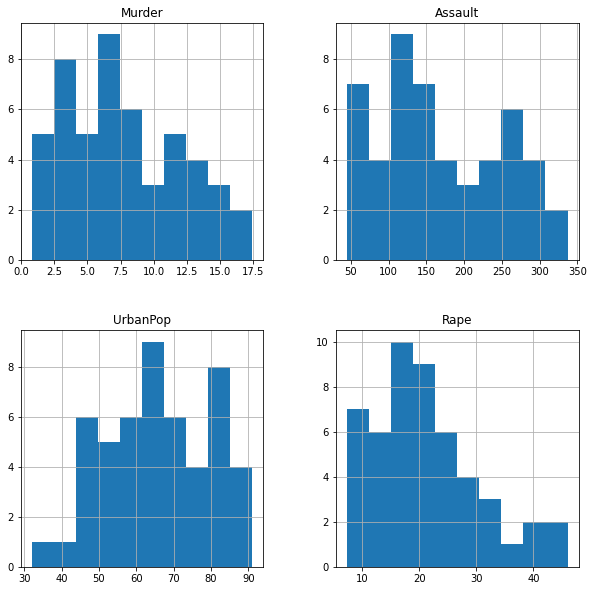

In [9]:
df.hist(figsize = (10, 10)); # histogram dagılımı

### Model ve Görselleştirme

In [10]:
# modelin olusturulması
kmeans = KMeans(n_clusters = 4).fit(df)

In [11]:
# model parametrelerini inceleme
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        ~/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initial

In [12]:
kmeans.n_clusters # küme sayısı

4

In [13]:
kmeans.cluster_centers_ # merkezler

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [14]:
kmeans.labels_ # her bir gözlemin sınıf etiketi

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int32)

* 2D Görselleştirme

In [15]:
kmeans = KMeans(n_clusters = 2) # küme sayısı: 2
k_fit = kmeans.fit(df)

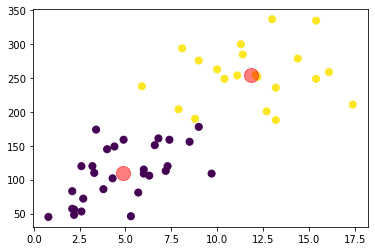

In [16]:
kumeler = k_fit.labels_
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = kumeler, s = 50, cmap = 'viridis')

merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:, 0], merkezler[:, 1], c = 'red', s = 200, alpha = 0.5);

* 3D Görselleştirme

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
kmeans = KMeans(n_clusters = 3) # küme sayısı: 3
k_fit = kmeans.fit(df)

/tmp/ipykernel_10747/3108031453.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


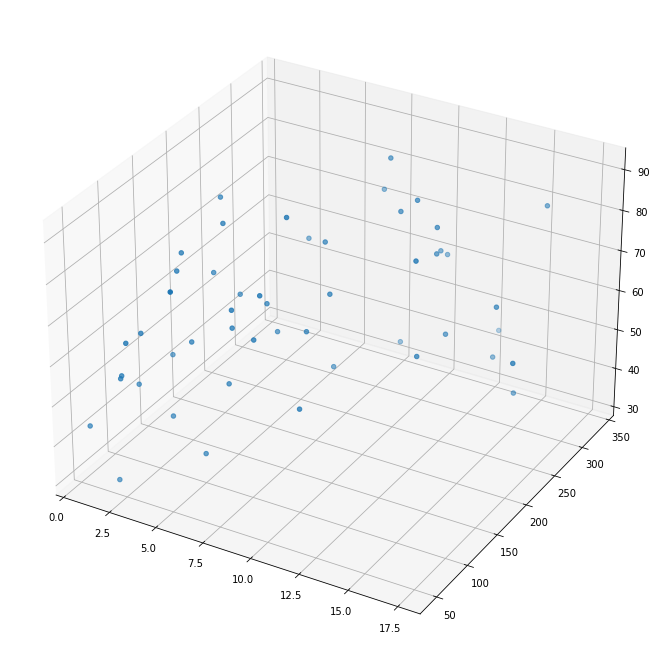

In [19]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

/tmp/ipykernel_10747/1457280198.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


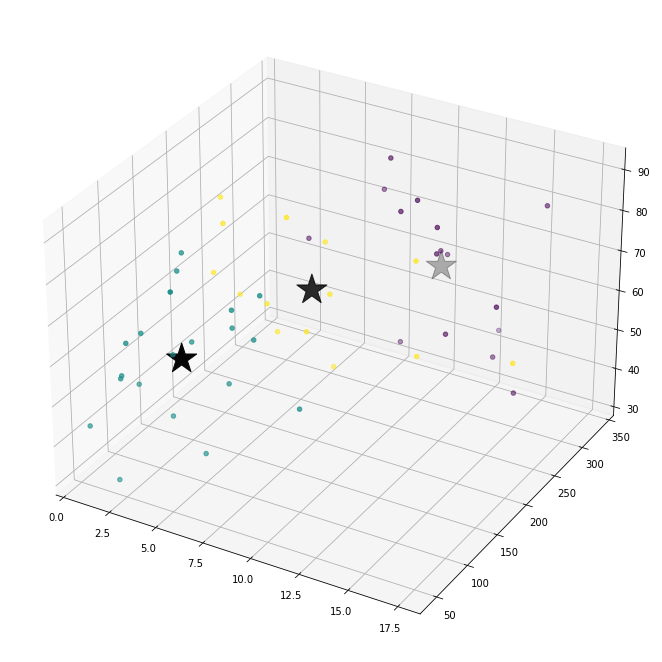

In [20]:
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c = kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker = '*',
           c = '#050505',
           s = 1000);

In [21]:
# kümeler ve gözlem birimleri,
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [22]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [23]:
df["kume_no"] = kumeler
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [24]:
df['kume_no'] = df['kume_no'] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


### Model Tuning

* Optimum küme sayısının belirlenmesi

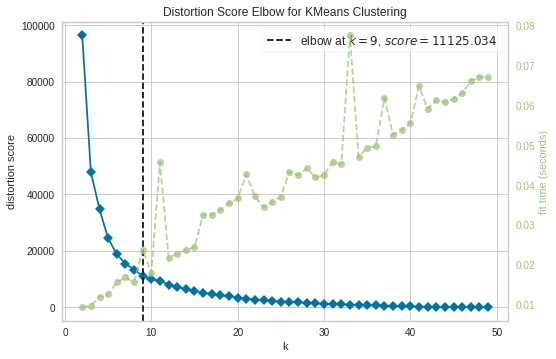

In [25]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2, 50))
visualizer.fit(df)
visualizer.poof();

In [26]:
# final modelinin olusturulması,
kmean = KMeans(n_clusters = 4) # optimum k degeri: 4
kmean = kmean.fit(df)

kumeler = kmean.labels_ # sınıf etiketleri
pd.DataFrame({'Eyaletler': df.index, 'Kumeler': kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,3
